# Task: Sentiment Analysis for Movie Reviews

### Objective:
Develop a robust machine learning model capable of accurately classifying movie
reviews as positive or negative based on the textual content.

### About Dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.<br><br>
**Link:** <a>https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews</a>

#### Importing necessary libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import nltk, re, os, string, pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#### Importing dataset

In [2]:
dataset = pd.read_csv("./data/IMDB Dataset.csv")

### Exploratory Data Analysis (EDA)

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

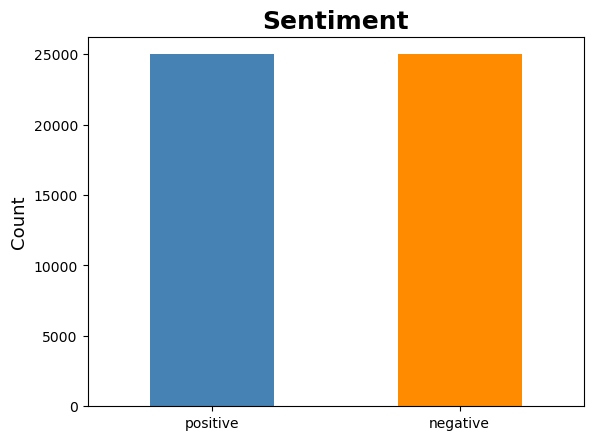

In [11]:
fig, ax = plt.subplots()

dataset['sentiment'].value_counts().plot(kind = 'bar', ax = ax, color = ['steelBlue', 'DarkOrange'])
ax.set_title('Sentiment', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

There are two labels for our target columns and we can see our dataset is completely balanced.

### Data Cleaning

Data cleaning process includes following tasks:<br>
1. Removal of HTML contents.
2. Removal of punctuations.
3. Lowercasing the text.
4. Removal of stopwords.
5. Stemming/Lemmatization.
6. Vectorization

Let's try to do data cleaning in single text data and then later apply it to all dataset.

In [12]:
review = dataset['review'][0]
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

**1. Removal of HTML contents**

In [14]:
soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

**2. Removal of punctuations**

In [17]:
review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

**3. Lowercasing the text**

In [18]:
review = review.lower()
review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

**4. Removal of stopwords**<br><br>
Splitting the words into list.

In [19]:
review = review.split()
review

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'you',
 'll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'on',
 '

In [20]:
review = [word for word in review if not word in set(stopwords.words('english'))]
review

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'dare',
 

**5. Stemming/Lemmatization.**<br>
We use lemmatization instead of stemming because lemmatization gives the actual meaning to the word.

In [21]:
lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'dare',
 'forget',
 'pretty',
 'p

Finally, we merge the words in form a text.

In [22]:
review = ' '.join(review)
review

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz m

**6. Vectorization**<br>
Converting text into TF-IDF.

In [23]:
corpus = []
corpus.append(review)

In [25]:
tf_idf = TfidfVectorizer()
review_tf_idf = tf_idf.fit_transform(corpus)

review_tf_idf.toarray()

array([[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.125 ,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.125 ,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.125 , 0.0625, 0.0625, 0.125 , 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.125 ,
        0.0625, 0.1875, 0.0625, 0.0625, 0.125 , 0.0625, 0.0625, 0.125 ,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.125 , 0.0625,
        0.0625, 0.0625, 0.125 , 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.375 , 0.0625, 0.0625, 0.0625,
        0.0625, 0.1875, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.125 , 0.0625, 0.0625, 0.125 , 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.25  , 0.0625, 0.0625, 0.0625, 

### Splitting dataset into train and test set

In [27]:
X = dataset['review']
y = dataset['sentiment']

y = (y.replace({'positive': 1, 'negative': 0})).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
corpus_train = []
corpus_test  = []
lem = WordNetLemmatizer()

for i in range(X_train.shape[0]):
    soup = BeautifulSoup(X_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_train.append(review)
    
for j in range(X_test.shape[0]):
    soup = BeautifulSoup(X_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_test.append(review)

C:\Users\Nirajan\Desktop\Machine Learning\Learning\env\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [ ]:
tfidf_vec = TfidfVectorizer()

tfidf = tfidf_vec.fit(corpus_train)

pickle.dump(tfidf, open('.\model\tfidf.pkl', 'wb'))

In [30]:
X_train_vec = tfidf.transform(corpus_train)
X_test_vec = tfidf.transform(corpus_test)

### Training the model

#### 1. Logistic regression

In [41]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vec, y_train)

y_pred = logistic_regression.predict(X_test_vec)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy : 89.41%
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      5044
    Positive       0.88      0.91      0.90      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix: 
 [[4427  617]
 [ 442 4514]]


In [61]:
print(f'The accuracy of Logistic Regression on Train_set is {metrics.accuracy_score(y_train, logistic_regression.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Logistic Regression on Test_set is {metrics.accuracy_score(y_test, logistic_regression.predict(X_test_vec))*100:.2f}%.')

The accuracy of Logistic Regression on Train_set is 93.17%.
The accuracy of Logistic Regression on Test_set is 89.41%.


In [179]:
with open('.\model\LR.pkl', 'wb') as file:
    pickle.dump(logistic_regression, file)

In [56]:
grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_CV_logistic = GridSearchCV(logistic_regression, grid, cv=5, scoring='accuracy', verbose=2)
grid_CV_logistic.fit(X_train_vec, y_train)
best_param = grid_CV_logistic.best_params_
print(best_param)

final_lr = grid_CV_logistic.best_estimator_
y_pred = final_lr.predict(X_test_vec)

accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l2, sol

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=10

[CV] END ....C=1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=  13.3s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   9.6s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   9.1s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=  12.9s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=  10.2s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END .........C=1, max_i

In [62]:
print(f'The accuracy of Final LR on Train_set is {metrics.accuracy_score(y_train, final_lr.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Final LR on Test_set is {metrics.accuracy_score(y_test, final_lr.predict(X_test_vec))*100:.2f}%.')

The accuracy of Final LR on Train_set is 93.17%.
The accuracy of Final LR on Test_set is 89.42%.


In [182]:
with open('.\model\\final_LR.pkl', 'wb') as file:
    pickle.dump(final_lr, file)

#### 2. Linear SVC

In [43]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_vec, y_train)

y_pred = linear_svc.predict(X_test_vec)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy : 89.95%
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      5044
    Positive       0.89      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4491  553]
 [ 452 4504]]


In [63]:
print(f'The accuracy of Linear SVC on Train_set is {metrics.accuracy_score(y_train, linear_svc.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Linear SVC on Test_set is {metrics.accuracy_score(y_test, linear_svc.predict(X_test_vec))*100:.2f}%.')

The accuracy of Linear SVC on Train_set is 98.54%.
The accuracy of Linear SVC on Test_set is 89.95%.


In [183]:
with open('.\model\linear_svc.pkl', 'wb') as file:
    pickle.dump(linear_svc, file)

In [60]:
grid = {
    'C': [0.01, 0.1, 0.5, 1], 
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 5000, 10000]
}

grid_CV_svc = GridSearchCV(linear_svc, grid, cv=5, scoring='accuracy', verbose=2)
grid_CV_svc.fit(X_train_vec, y_train)
best_param = grid_CV_svc.best_params_
print(best_param)

final_svc = grid_CV_svc.best_estimator_
y_pred = final_svc.predict(X_test_vec)

accuracy = metrics.accuracy_score(y_pred, y_test)
print(f'Accuracy : {accuracy*100}%')
print(f"Classification Report: \n {classification_report(y_test, y_pred,target_names=['Negative','Positive'])}")
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.01, loss=hinge, max_iter=5000; total time=   0.0s
[CV] END .................C=0.01, loss=hinge, max_iter=10000; total time=   0.0s
[CV] END .................C=0.01, loss=hinge, m

[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.7s
[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   2.2s
[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.5s
[CV] END ....................C=1, loss=hinge, max_iter=10000; total time=   0.4s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=1000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=5000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=5000; total time=   0.3s
[CV] END .............C=1, loss=squared_hinge, max_iter=5000; total time=   0.3s
[CV] END .............C=1, l

In [64]:
print(f'The accuracy of Final Linear SVC on Train_set is {metrics.accuracy_score(y_train, final_svc.predict(X_train_vec))*100:.2f}%.')
print(f'The accuracy of Final Linear SVC on Test_set is {metrics.accuracy_score(y_test, final_svc.predict(X_test_vec))*100:.2f}%.')

The accuracy of Final Linear SVC on Train_set is 97.23%.
The accuracy of Final Linear SVC on Test_set is 90.13%.


In [184]:
with open('.\model\\final_svc.pkl', 'wb') as file:
    pickle.dump(final_svc, file)

#### Conclusion
From the above two model, linear SVC is giving higher accuracy but the model is overfitted. So, the optimal model is final logistic regression which is less overfitted compared to linear SVC.

## Using RNN(LSTM) with PyTorch

We can also predict sentiment using RNN which works best for sequential data such as text.

In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from collections import Counter
from tqdm  import tqdm

In [120]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Tokenization
We can also use tfidf data directly but

In [149]:
word_list=[]
for text in corpus_train:
    for word in text.split():
        word_list.append(word)
        
corpus = Counter(word_list)

len(corpus)

83464

In [150]:
# sorting on the basis of most common words
corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:10000]

# creating a dict
onehot_dict =  {w:i+1 for i,w in enumerate(corpus_)}

In [151]:
# tokenize
X_train_token, X_test_token =[], []
for text in corpus_train:
    X_train_token.append([onehot_dict[word] for word in text.split() if word in onehot_dict.keys()])
    
for text in corpus_test:
    X_test_token.append([onehot_dict[word] for word in text.split() if word in onehot_dict.keys()])
    
X_train_token = np.array(X_train_token)
X_test_token = np.array(X_test_token)

#### Analyzing review length

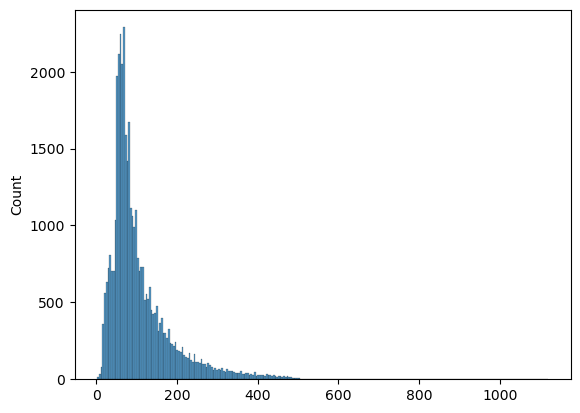

In [152]:
review_length = [len(i) for i in X_train_token]
sns.histplot(pd.Series(review_length));

In [153]:
pd.Series(review_length).describe()

count    40000.000000
mean       108.623525
std         80.540962
min          3.000000
25%         59.000000
50%         81.000000
75%        132.000000
max       1120.000000
dtype: float64

#### Padding
Padding every sequence to max length. From the above histogram and description, we can see that many of the review are aroud length 100 and not much of the review are of length more than 500. So, we take `max_length` as 500 and discard review above length 500.

In [154]:
def padding(data, seq_len=500):
    features = np.zeros((len(data), seq_len),dtype=int)
    for i, review in enumerate(data):
        features[i, -len(review):] = np.array(review)[:seq_len]
        
    return features

In [155]:
X_train_pad = padding(X_train_token)
X_test_pad = padding(X_test_token)

#### Batching the dataset 

In [156]:
# Create tensor dataset
training_data = TensorDataset(torch.from_numpy(X_train_pad),torch.from_numpy(y_train))
testing_data = TensorDataset(torch.from_numpy(X_test_pad),torch.from_numpy(y_test))

# Dataloader
batch_size=50
train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=batch_size)

In [157]:
# One batch of training data
dataiter = iter(train_loader)
sample_x, sample_y =next(dataiter)

sample_x, sample_y

(tensor([[   0,    0,    0,  ...,   93,  837, 1537],
         [   0,    0,    0,  ...,   70,    1, 3437],
         [   0,    0,    0,  ...,  411, 2346, 6069],
         ...,
         [   0,    0,    0,  ...,  126,  381,    3],
         [   0,    0,    0,  ..., 1010,  600, 6500],
         [   0,    0,    0,  ...,   46,   25,  100]], dtype=torch.int32),
 tensor([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
         0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
         1, 0]))

#### Building Model

In [158]:
class SentimentLSTM(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim):
        super(SentimentLSTM, self).__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        
        self.no_layers = no_layers
        self.vocab_size = vocab_size
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # LSTM
        self.lstm = nn.LSTM(input_size=embedding_dim, 
                           hidden_size=self.hidden_dim,
                           num_layers=no_layers,
                           batch_first=True)
        # dropout layer
        self.dropout = nn.Dropout(0.3)
         # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)
        
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        
        hidden = (h0, c0)
        return hidden

In [161]:
no_layers = 2
vocab_size = 10000 + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256

model = SentimentLSTM(no_layers,vocab_size,hidden_dim,embedding_dim)


#moving to gpu
model.to(device)

print(model)

SentimentLSTM(
  (embedding): Embedding(10001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [162]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred, label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred==label.squeeze()).item()

In [163]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_tst_loss = [],[]
epoch_tr_acc,epoch_tst_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    
    model.train()
    
    # initialize hidden state
    h = model.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        
        output, h = model(inputs, h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        
        loss.backward()
        train_losses.append(loss.item())
        
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
    test_h = model.init_hidden(batch_size)
    test_losses = []
    test_acc = 0.0
    
    model.eval()
    
    for inputs, labels in test_loader:
        test_h = tuple([each.data for each in test_h])
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        output, test_h = model(inputs, test_h)
        test_loss = criterion(output.squeeze(), labels.float())

        test_losses.append(test_loss.item())

        accuracy = acc(output,labels)
        test_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_test_loss = np.mean(test_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_test_acc = test_acc/len(test_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_tst_loss.append(epoch_test_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_tst_acc.append(epoch_test_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_test_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_test_acc*100}')
    if epoch_test_loss <= valid_loss_min:
        torch.save(model.state_dict(), '.\model\state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_test_loss))
        valid_loss_min = epoch_test_loss
    print(25*'==')

Epoch 1
train_loss : 0.54202321998775 val_loss : 0.4053731870651245
train_accuracy : 72.6875 val_accuracy : 81.69
Validation loss decreased (inf --> 0.405373).  Saving model ...
Epoch 2
train_loss : 0.3608425719011575 val_loss : 0.3641333021968603
train_accuracy : 84.55 val_accuracy : 84.25
Validation loss decreased (0.405373 --> 0.364133).  Saving model ...
Epoch 3
train_loss : 0.28151009416207673 val_loss : 0.302841951623559
train_accuracy : 88.6 val_accuracy : 87.58
Validation loss decreased (0.364133 --> 0.302842).  Saving model ...
Epoch 4
train_loss : 0.23445973569527268 val_loss : 0.2875718029588461
train_accuracy : 90.815 val_accuracy : 87.6
Validation loss decreased (0.302842 --> 0.287572).  Saving model ...
Epoch 5
train_loss : 0.19792760391253977 val_loss : 0.30335527036339044
train_accuracy : 92.4825 val_accuracy : 88.03999999999999


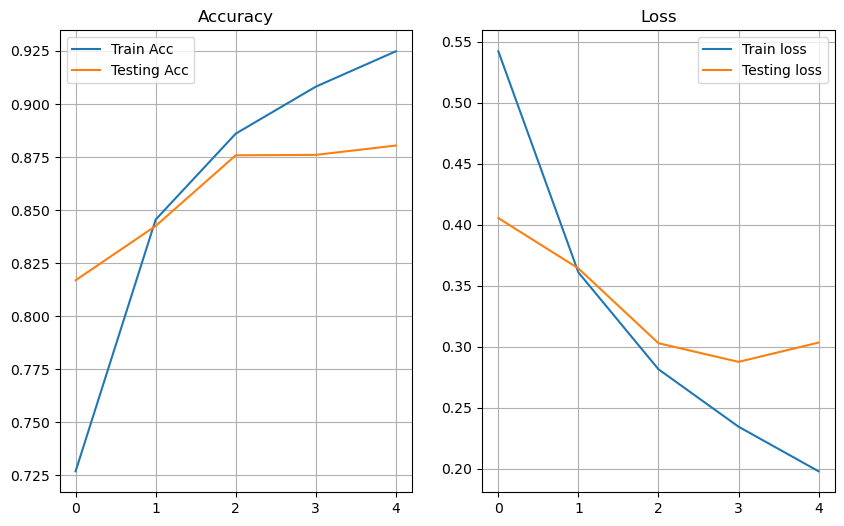

In [164]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_tst_acc, label='Testing Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_tst_loss, label='Testing loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [169]:
def predict_text(text):
    soup = BeautifulSoup(text, "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    word_seq = np.array([onehot_dict[word] for word in review.split() if word in onehot_dict.keys()])
    word_seq = np.expand_dims(word_seq,axis=0)
    pad =  torch.from_numpy(padding(word_seq))
    inputs = pad.to(device)
    batch_size = 1
    h = model.init_hidden(batch_size)
    h = tuple([each.data for each in h])
    output, h = model(inputs, h)
    if output.item()>0.50:
        return('Positive')
    else:
        return('Negative')

In [35]:
def predict_lr(text):
    corpus = []
    soup = BeautifulSoup(text, "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)
    review_tf_idf = tfidf.transform(corpus)
    review_tf_idf.toarray()
    
    output = final_lr.predict(review_tf_idf)

    if output.item() == 1:
        print('Positive')
    else:
        print('Negative')

In [33]:
text1 = 'Starting was not that great but as the movie progressed, the story become more interesting.'
text2 = 'This is not what I expected when I watched the trailor of the movie. The story is so generic.'

In [171]:
predict_text(text1)

'Positive'

In [172]:
predict_text(text2)

'Negative'

#### Conclusion
Therefore, the model to predict the sentiment based on review has been completed.<br><br>
We choose logistic regression as our final model to deploy which has the highest accuracy.